In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
df = sns.load_dataset("titanic") 
num_df = df.select_dtypes(include="number")

In [3]:
print("\nDescriptive Statistics:")
print(num_df.describe())


Descriptive Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [4]:
skewness = num_df.apply(lambda x: skew(x.dropna()))
kurt = num_df.apply(lambda x: kurtosis(x.dropna()))

summary = pd.DataFrame({
    "Mean": num_df.mean(),
    "Std Dev": num_df.std(),
    "Skewness": skewness,
    "Kurtosis": kurt
})

print("\nSummary with Skewness & Kurtosis:")
print(summary)


Summary with Skewness & Kurtosis:
               Mean    Std Dev  Skewness   Kurtosis
survived   0.383838   0.486592  0.477717  -1.771786
pclass     2.308642   0.836071 -0.629486  -1.279570
age       29.699118  14.526497  0.388290   0.168637
sibsp      0.523008   1.102743  3.689128  17.773512
parch      0.381594   0.806057  2.744487   9.716613
fare      32.204208  49.693429  4.779253  33.204289


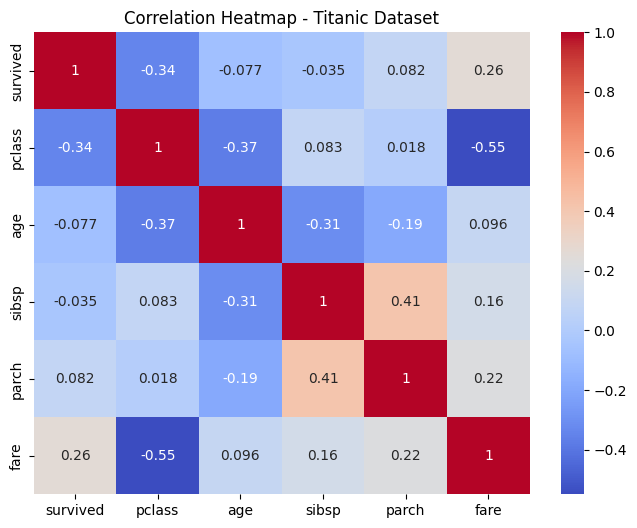

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()